In [1]:
import numpy as np
from sklearn.decomposition import PCA
from astropy.io import fits

class LightcurveMatrix(object):
    """
    
    """
    
    def __init__(self, fits_file):
        with fits.open(fits_file, mode="readonly") as hdulist:
            self.time = hdulist[1].data["TIME"]
            self.flux = hdulist[1].data["FLUX"]
        
        self.lcm = self.flux.T.reshape(self.flux.shape[1]**2, self.flux.shape[0])
        
    def get_time(self):
        return self.time
        
    def get_imagestack(self):
        return self.flux

In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

lcm = LightcurveMatrix("tess-s0001-3-3_36.820737_-82.019560_64x64_astrocut.fits")
time = lcm.get_time()
im_stack = lcm.get_imagestack()

k = 8
pca = PCA(n_components = k)
pca.fit(lcm.lcm)


PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [7]:
def plot_elc(pca):
    for i in range(pca.components_.shape[0]):
        plt.figure()
        plt.plot(time, pca.components_[i])
        
def 

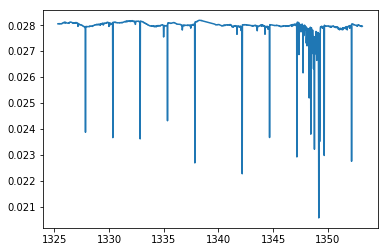

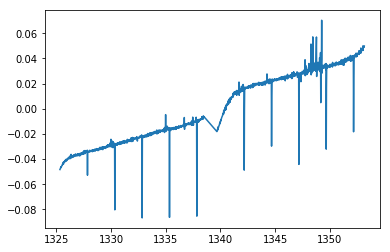

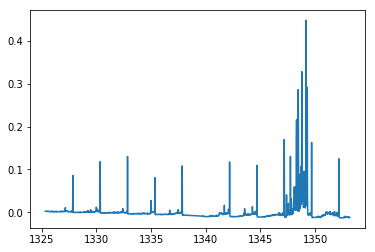

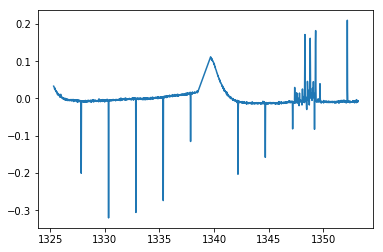

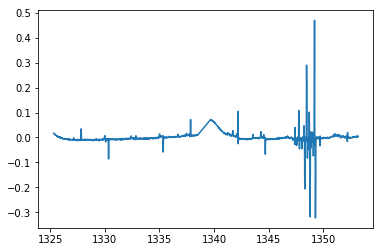

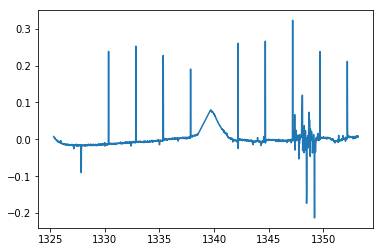

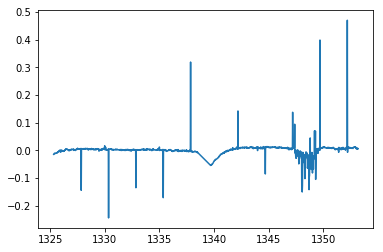

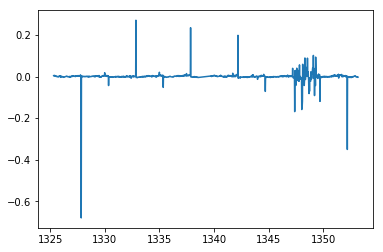

In [8]:
plot_elc(pca)